## Store Sales - Time Series Forecasting

In [105]:
#impport Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [57]:
#Read available data sets
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df3 = pd.read_csv('stores.csv')
df4 = pd.read_csv('transactions.csv')
df5 = pd.read_csv('holidays_events.csv')
df6 = pd.read_csv('oil.csv')

In [58]:
df1.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [11]:
# data information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [12]:
df1.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [13]:
df1.store_nbr.value_counts()

1     55572
46    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
47    55572
10    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
35    55572
34    55572
33    55572
32    55572
11    55572
12    55572
13    55572
14    55572
15    55572
16    55572
17    55572
18    55572
19    55572
2     55572
20    55572
21    55572
22    55572
23    55572
24    55572
25    55572
26    55572
27    55572
28    55572
29    55572
3     55572
30    55572
31    55572
9     55572
Name: store_nbr, dtype: int64

### Data visualization and processing

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

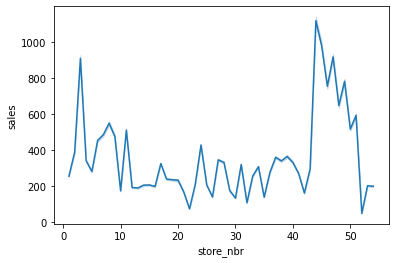

In [17]:
sns.lineplot(x="store_nbr", y="sales",
             data=df1)

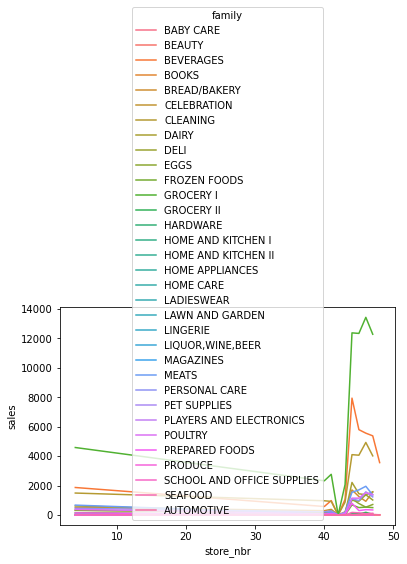

In [33]:
# Plot the responses for different events and regions
sns.lineplot(x="store_nbr", y="sales",
             hue="family",
             data=df1[10000:10300])
plt.show()

<AxesSubplot:>

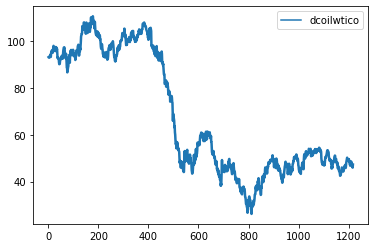

In [35]:
sns.lineplot(data=df6, palette="tab10", linewidth=2.5)

<AxesSubplot:>

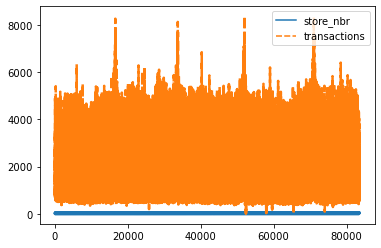

In [38]:
sns.lineplot(data=df4, palette="tab10", linewidth=2.5)

D:\Anaconda3\envs\BML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

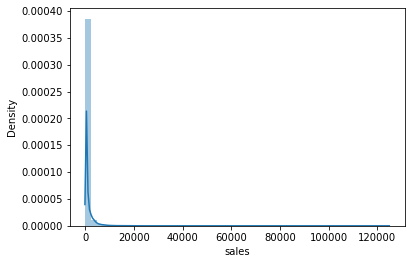

In [39]:
sns.distplot(df1['sales'])
plt.show()

In [59]:
df=pd.concat([df1,df2])
df.drop(columns='id',inplace=True)

In [60]:
df['date'] = pd.to_datetime(df['date'])
categorical_cols = ['store_nbr', 'family']

for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in store_nbr: 54
Unique values in family: 33


In [62]:
# Feature Engineering
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['weekend'] = df['day_of_week'].isin([5, 6]).astype(int) 

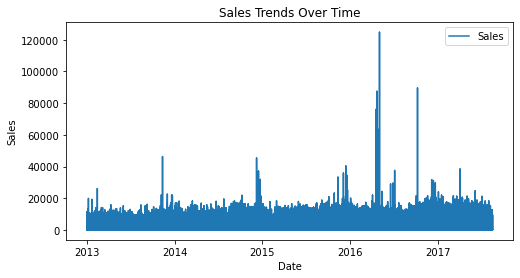

In [64]:
# Data Visualization on sales
plt.figure(figsize=(8, 4))
plt.plot(df['date'], df['sales'], label='Sales')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

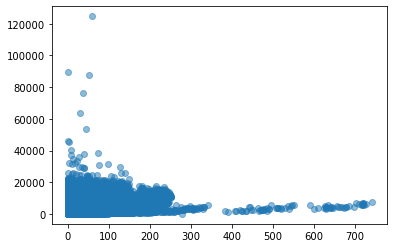

In [65]:
plt.scatter(df['onpromotion'],df['sales'],alpha=0.5)
plt.show()

Text(0.5, 1.0, 'sales by month')

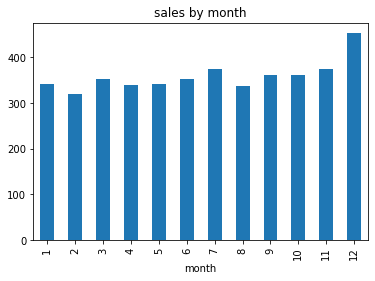

In [66]:
p=df.groupby('month')['sales'].mean()
p.plot(kind='bar')
plt.title('sales by month')

In [68]:
df.isnull().sum()

date               0
store_nbr          0
family             0
sales          28512
onpromotion        0
year               0
month              0
day                0
day_of_week        0
weekend            0
dtype: int64

In [71]:
df = df.dropna()

In [72]:
df.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
year           0
month          0
day            0
day_of_week    0
weekend        0
dtype: int64

In [74]:
df.drop('date',axis=1,inplace=True)

C:\Users\Salah\AppData\Local\Temp\ipykernel_6712\2473141666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('date',axis=1,inplace=True)


In [77]:
lab = LabelEncoder()

In [82]:
df.family = lab.fit_transform(df.family)
df 

,store_nbr,family,sales,onpromotion,year,month,day,day_of_week,weekend
0,1,0,0.000,0,2013,1,1,1,0
1,1,1,0.000,0,2013,1,1,1,0
2,1,2,0.000,0,2013,1,1,1,0
3,1,3,0.000,0,2013,1,1,1,0
4,1,4,0.000,0,2013,1,1,1,0
...,...,...,...,...,...,...,...,...,...
3000883,9,28,438.133,0,2017,8,15,1,0
3000884,9,29,154.553,1,2017,8,15,1,0
3000885,9,30,2419.729,148,2017,8,15,1,0
3000886,9,31,121.000,8,2017,8,15,1,0


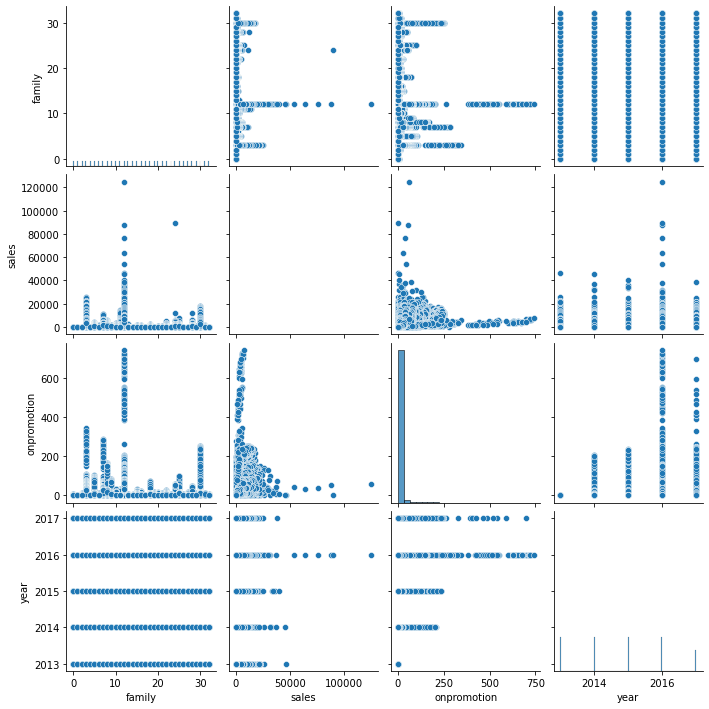

In [83]:
sns.pairplot(df.iloc[:,1:5])

### Split data for testing and training

In [84]:
x = df.drop(['sales'],axis=1)
y = df['sales']

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state=20)

In [92]:
#We create a function that makes it easy for us to train and test any model
def kfolds(model, model_name):
    model = cross_val_score(model, x,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")
def model_train(model,model_name):
    model.fit(X_train,Y_train)
    model_train_score = model.score(X_train, Y_train)
    model_test_score = model.score(X_test, Y_test)
    print(f"{model_name} model score on Train= {model_train_score *100}%\n{model_name} model score on Test= {model_test_score*100}%")

In [93]:
model = LinearRegression()
model_train(model,'LinearRegression')
kfolds(model,'LinearRegression')

LinearRegression model score on Train= 19.899753916719565%
LinearRegression model score on Test= 19.645436921646176%
LinearRegression score on cross validation: 13.985475369707506%


In [98]:
model_XG = XGBRegressor()
model_train(model_XG, "XGBRegressor")
kfolds(model_XG, "XGBRegressor")

XGBRegressor model score on Train= 90.47035752528649%
XGBRegressor model score on Test= 89.10398543096382%
XGBRegressor score on cross validation: 84.33180968105421%


In [99]:
model_RFR = DecisionTreeRegressor()
model_train(model_RFR,'DecisionTreeRegressor')
kfolds(model_RFR,'DecisionTreeRegressor')

DecisionTreeRegressor model score on Train= 100.0%
DecisionTreeRegressor model score on Test= 87.62324530203152%
DecisionTreeRegressor score on cross validation: 80.92254319196577%


In [106]:
mode_ploy = Ridge()
model_train(mode_ploy,'PolynomialFeatures')
kfolds(mode_ploy,'PolynomialFeatures')

PolynomialFeatures model score on Train= 19.89975391670852%
PolynomialFeatures model score on Test= 19.645436957603835%
PolynomialFeatures score on cross validation: 13.985476264211183%


### We note that the best models are XGBRegressor

In [107]:
pred_xgb = model_XG.predict(X_test)

In [108]:
pred_xgb

array([289.10776  , 428.80603  , 180.51852  , ...,   2.4176621,
        26.498274 ,  -4.160342 ], dtype=float32)

In [110]:
from sklearn.metrics import mean_squared_error

### Save prediction results to csv file

In [115]:
mse_xgb = mean_squared_error(Y_test, pred_xgb)
xgb_rmse = np.sqrt(mse_xgb)
print("rmse_xgb:", xgb_rmse)

submission = pd.DataFrame({'sales': pred_xgb})
print(submission)
submission.to_csv('submission1s.csv', index=False)

rmse_xgb: 363.95484669349145
              sales
0        289.107758
1        428.806030
2        180.518524
3        169.020782
4       1344.585815
...             ...
750217   197.911942
750218    27.540794
750219     2.417662
750220    26.498274
750221    -4.160342

[750222 rows x 1 columns]
